<h1> 20156025 Park Sungho</h1>

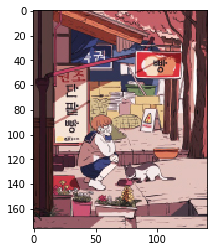

In [1]:
import PIL.Image as pilimg
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import random

#0. 이미지 불러오기
im = pilimg.open('image.jpg')
pix = np.array(im)
size_row = len(pix)
size_col = len(pix[0,:])

#1. 이미지 float형으로 변환
pix_float = np.zeros((size_row,size_col,3),dtype = 'float')
for i in range(size_row):
    for j in range(size_col):
        pix_float[i][j] = pix[i][j]/255



row = np.zeros((size_row,size_col),dtype = 'float')
col = np.zeros((size_row,size_col),dtype = 'float')
#데이터가 어디그룹인지 표시
group_num = np.zeros((size_row,size_col),dtype = 'int') 

#[0,1] row,col
for i in range(size_row):
    for j in range(size_col):
        row[i][j] = i/(size_row-1)
        col[i][j] = j/(size_col-1)
        
#print(row)
#print(col)
plt.imshow(pix)

In [2]:
#norm 2
def distance(x, y):

    d = (x - y) ** 2
    s = np.sum(d)
    r = np.sqrt(s)

    return(r)

#가장 작은 distance를 가지는 centeroid가 무엇인지 찾아주는 func
def min_dst(temp,k,x,y):
    group = 0
    min = temp[0]
    for i in range(k):
        if temp[i] < min:
            min = temp[i] #centeroid[i] 와의 distance가 가장 작다
            group = i
    group_num[x,y] = group  #즉 x번째 데이터는 i 그룹이다..
    return min

def init(rgb_centeroid,pos_centeroid,k):
    for i in range(k):
        pos_centeroid[i][0] = random.randrange(0,size_row)/float(size_row-1)
        pos_centeroid[i][1] = random.randrange(0,size_col)/float(size_col-1)
        for j in range(3):
            rgb_centeroid[i][j] = random.randrange(0,255)/float(255)

In [3]:
# plot Energy
def plotEnergy(energy):
    plt.title('Energy')
    plt.plot(energy,'bo-')
    plt.xlabel('iteration')
    plt.ylabel('energy')
    plt.legend() #범례
    plt.show()

# plot Accuracy
def plotImage(centeroid):
    result = np.zeros((size_row,size_col,3),dtype = 'uint8')
    
    for i in range(size_row):
        for j in range(size_col):
            for k in range(3):
                result[i,j,k] = int(centeroid[group_num[i][j],k] * 255)
            
    fig = plt.figure()
    ax1 = fig.add_subplot(1,2,1)
    ax2 = fig.add_subplot(1,2,2)
    
    plt.title('Left : Image , Right : K_means Image')
    
    ax1.imshow(pix)
    ax2.imshow(result)
    


In [3]:
def Kmeans(k,a):
    temp = np.zeros(k,dtype = 'float')
    rgb_dst = np.zeros(k,dtype = 'float')
    pos_dst = np.zeros(k,dtype = 'float')
    
    min_distance = np.zeros((size_row,size_col),dtype = 'float')
    
    #rgb
    rgb_centeroid = np.zeros((k,3),dtype = 'float')
    rgb_pre_centeroid = np.zeros((k,3),dtype = 'float')
    
    #position
    pos_centeroid = np.zeros((k,2),dtype = 'float')   #x,y k개 중심점
    pos_pre_centeroid = np.zeros((k,2),dtype = 'float')
    
    iteration = 0
    energy = []
    
    #pix = np.array(im)
    
    #0. initalization
    init(rgb_centeroid,pos_centeroid,k)
    
    #3.이전 centeroid와 현재 centeroid가 같을때까지 반복
    while (not(np.array_equal(rgb_pre_centeroid, rgb_centeroid))):
        group_count = np.zeros(k,dtype = 'int')
        rgb_avg = np.zeros((k,3),dtype = 'float')
        pos_avg = np.zeros((k,2),dtype = 'float')
        
        rgb_pre_centeroid = rgb_centeroid
        pos_pre_centeroid = pos_centeroid
        
        #1. 각 픽셀과 centeroid를 비교 
        #2. => 가장 작은걸로 그룹
        for i in range(size_row):
            for j in range(size_col):
                for x in range(k):
                    position = np.array([row[i][j],col[i][j]])
                    
                    rgb_dst[x] = distance(pix_float[i,j,:],rgb_centeroid[x,:]) #픽셀과 centeroid의 distance
                    pos_dst[x] = a * distance(position,pos_centeroid[x,:])  #픽셀위치와 centeroid의 distance
                    temp[x] = rgb_dst[x] + pos_dst[x]
                min_distance[i,j] = min_dst(temp,k,i,j) #가장 짧은 거리를 구한다(여기서 그룹이 정해짐).
                group_count[group_num[i][j]]+=1 #각 그룹 갯수
                
        energy.append(np.sum(min_distance))
        
        # 각 그룹의 평균값 구하기
        # Sum
        for i in range(size_row):
            for j in range(size_col):
                pos_avg[group_num[i][j],0] += row[i][0]
                pos_avg[group_num[i][j],1] += col[0][j]
                for l in range(3):
                    rgb_avg[group_num[i][j],l] += pix_float[i,j,l]
        # Divide
        for i in range(k):
            for j in range(2):#pos
                if group_count[i] != 0:
                    pos_avg[i,j] = pos_avg[i,j] / group_count[i]
            for j in range(3):#rgb
                if group_count[i] != 0:
                    rgb_avg[i,j] = rgb_avg[i,j] / group_count[i]
        
        #centeroid 변경
        rgb_centeroid = rgb_avg
        pos_centeroid = pos_avg
        
        iteration +=1
        
        
    plotEnergy(energy)
    
    plotImage(rgb_centeroid)
        
    #print(rgb_centeroid)
    #print(pos_centeroid)
    return iteration

<h3> 1, K - means (k = 3, lamda = {0.5, 2})</h3>

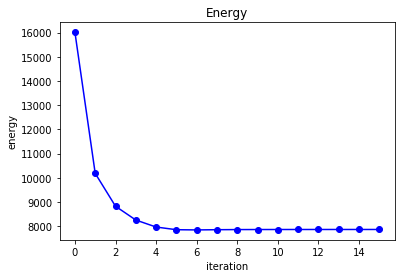

16

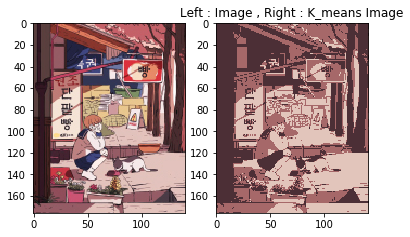

In [5]:
#1.k=3, lamda = 0.5
Kmeans(3,0.5)

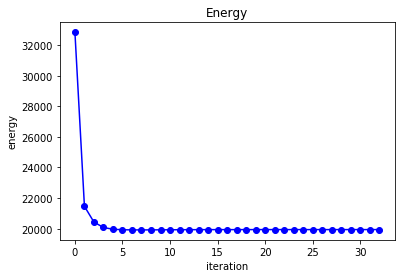

33

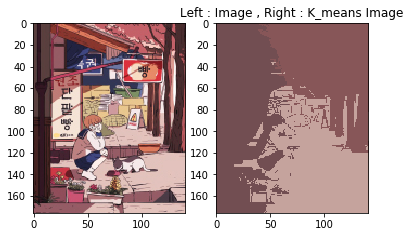

In [7]:
#1. k=3, lamda = 2
Kmeans(3,2)

<h3> 2, K - means (k = 5, lamda = {0.5, 2})</h3>

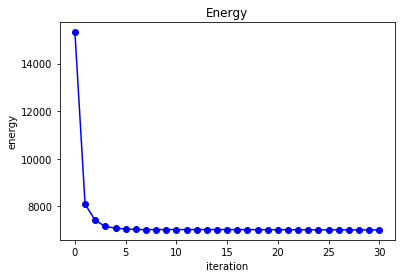

31

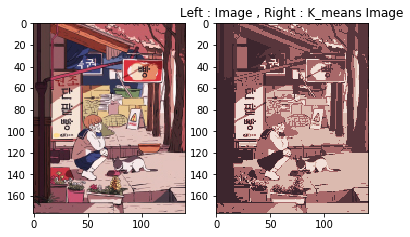

In [8]:
#k=5, lamda = 0.5
Kmeans(5,0.5)

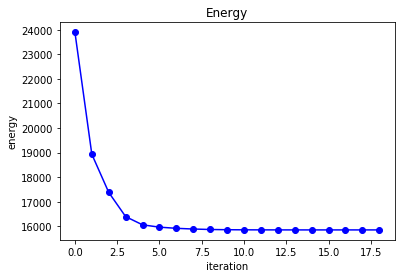

19

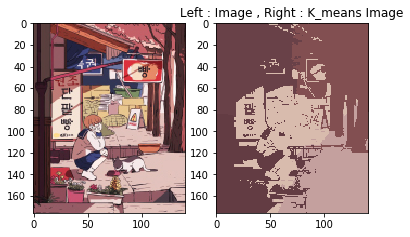

In [9]:
#k=5, lamda = 2
Kmeans(5,2)

<h3> 3. K - means (k = 10, lamda = {0, 0.2, 0.5, 2})</h3>

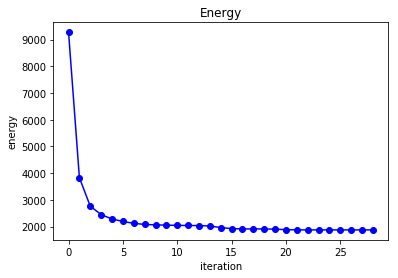

29

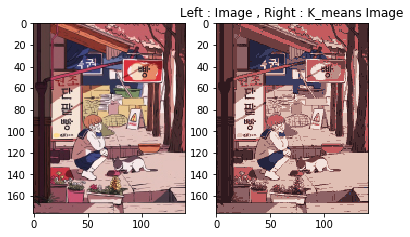

In [14]:
#k=10, lamda = 0
Kmeans(10,0)

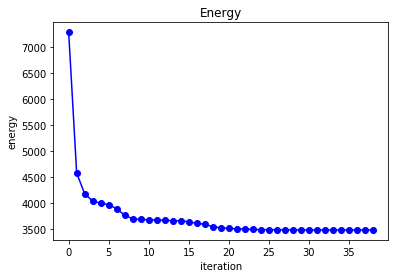

39

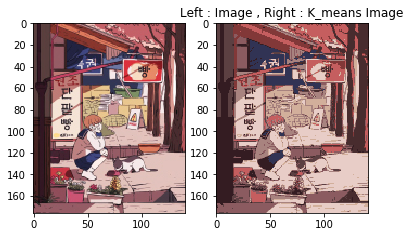

In [13]:
#k=10, lamda = 0.2
Kmeans(10,0.2)

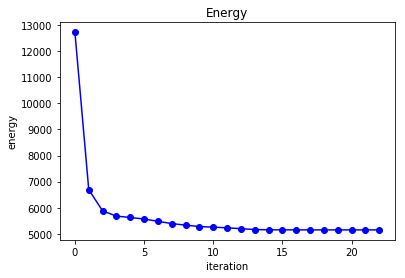

23

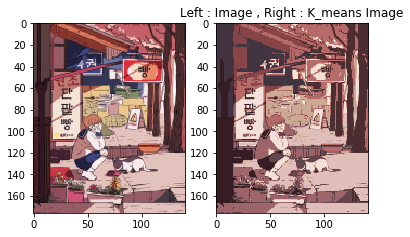

In [10]:
#k=10, lamda = 0.5
Kmeans(10,0.5)

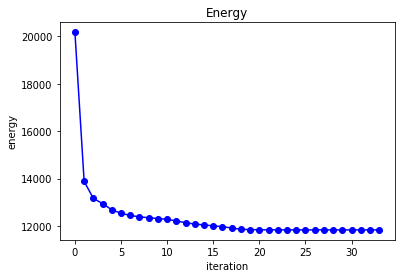

34

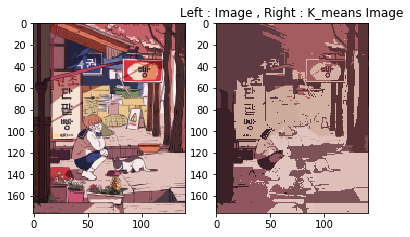

In [11]:
#k=10, lamda = 2
Kmeans(10,2)